In [120]:
import skimage
import skimage.io
from skimage import io, color
from scipy import ndimage
from skimage import exposure
from skimage.transform import resize
import os
import skimage.morphology
import skimage.measure
from skimage.morphology import binary_erosion, binary_dilation, rectangle
import scipy
import scipy.ndimage
# TODO use scipy.ndimage.binary_erosion instead of skimage.morphology.binary_erosion
from scipy.ndimage import binary_erosion, binary_dilation, binary_closing, binary_opening, generate_binary_structure
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.filters import threshold_otsu

In [133]:
def detekce_svu_complex_morpho(img):
    desired_width = 60
    desired_height = 150 
    resized_img = resize(img, (desired_width, desired_height), anti_aliasing=True)
    edge_roberts = skimage.filters.roberts(resized_img)
    #nhanced_image = exposure.equalize_hist(edge_roberts)
    nhanced_image = exposure.equalize_adapthist(edge_roberts, clip_limit=0.01)
    threshold = np.mean(nhanced_image)

    binary_image = nhanced_image > threshold*1.5
    kernel_big = skimage.morphology.rectangle(1,4)
    binary_image = skimage.morphology.binary_dilation(binary_image, kernel_big)
    label_image = skimage.morphology.label(binary_image)
    regions = skimage.measure.regionprops(label_image)
    largest_region = max(regions, key=lambda r: r.area)
    largest_object = np.zeros_like(binary_image)
    largest_object[label_image == largest_region.label] = 1
    kernel_big = skimage.morphology.rectangle(1,4)
    largest_object = skimage.morphology.binary_erosion(largest_object, kernel_big)
    kernel_big = skimage.morphology.rectangle(4,2)
    textd = skimage.morphology.binary_dilation(largest_object, kernel_big)
    kernel_big = skimage.morphology.rectangle(29,3)
    textd1 = scipy.ndimage.binary_erosion(textd, kernel_big, iterations=1)
    plt.imshow(textd1, cmap='gray')
    regions = skimage.morphology.label(textd1)
    num_objects = np.max(regions)
    return(num_objects)

In [134]:
def detekce_svu_eroze_bottom_half(img):
    enhanced_image = exposure.equalize_adapthist(img, clip_limit=0.01)

    edge_roberts = skimage.filters.roberts(enhanced_image)
    threshold = np.mean(enhanced_image)*0.65
    binary_image = enhanced_image < threshold
    skela = skimage.morphology.skeletonize(binary_image)
    kernel_big = skimage.morphology.rectangle(2,1)
    textd1 = skimage.morphology.binary_erosion(skela, kernel_big)
    textd2 = skimage.morphology.binary_erosion(textd1, kernel_big)
    textd3 = skimage.morphology.binary_erosion(textd2, kernel_big)
    textd4 = skimage.morphology.binary_erosion(textd3, kernel_big)
    textd5 = skimage.morphology.binary_erosion(textd4, kernel_big)
    rows, cols = textd5.shape
    mid_row = rows // 2
    mask = np.zeros_like(textd5, dtype=bool)
    mask[:mid_row, :] = True
    bottom_half = np.where(~mask, textd5, 0)
    labeled_image = skimage.measure.label(bottom_half, connectivity=1)
    num_objects = np.max(labeled_image)
    #print(num_objects)
    return(num_objects)

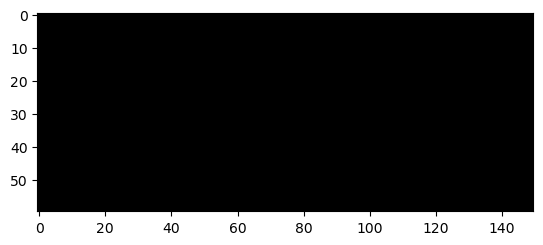

In [145]:
folder_path = 'D:/ZDO/semestralni prace/images/incision_couples/'
file_list = os.listdir(folder_path)
counts_button_er=[]
counts_complex_mor=[]
for file_name in file_list:
     if file_name.endswith('.jpg'):
        file_path = os.path.join(folder_path, file_name)
        #print(file_path)
        image = io.imread(file_path, as_gray=True)
        counts_button_er.append(detekce_svu_eroze_bottom_half(image))
        counts_complex_mor.append(detekce_svu_complex_morpho(image))

In [147]:
import pandas as pd

# Создаем DataFrame
data = {
    'filename': file_list,
    'n_stiches': counts_complex_mor,
}
df = pd.DataFrame(data)

# Сохраняем DataFrame в CSV файл
df.to_csv('output.csv', index=False)

In [144]:
df2 = pd.read_csv('output_segmentation.csv')

# Вывод первых 5 строк для проверки
print(df2.head())

                                            filename  n_stiches
0  SA_20220620-102621_8ka1kmwpywxv_incision_crop_...          2
1  SA_20220620-102621_8ka1kmwpywxv_incision_crop_...          1
2  SA_20220620-102621_8ka1kmwpywxv_incision_crop_...          2
3  SA_20220620-102621_8ka1kmwpywxv_incision_crop_...          0
4  SA_20220620-102621_8ka1kmwpywxv_incision_crop_...          4


In [138]:
goal=df2["n_stiches"]

In [139]:
score=0
for index in range(0, len(goal)):
    if goal[index]==counts_complex_mor[index]:
        score=score+1
        print(index)
normilized_score=score/134*100
print(normilized_score)

0
1
3
4
6
7
8
9
10
11
17
18
19
20
21
22
23
25
26
29
32
33
34
35
40
41
42
43
44
45
47
51
55
56
62
63
65
66
67
68
69
70
72
73
74
75
77
79
85
86
87
90
91
94
95
97
103
106
107
108
109
110
113
115
118
119
120
121
122
123
124
128
133
54.47761194029851


In [140]:
counts_complex_mor

[2,
 1,
 3,
 0,
 4,
 6,
 3,
 2,
 3,
 1,
 2,
 1,
 4,
 2,
 5,
 1,
 5,
 4,
 4,
 3,
 4,
 3,
 5,
 3,
 4,
 0,
 3,
 1,
 6,
 3,
 6,
 4,
 2,
 0,
 4,
 3,
 5,
 2,
 5,
 5,
 3,
 1,
 1,
 0,
 5,
 4,
 2,
 2,
 4,
 3,
 2,
 1,
 5,
 3,
 3,
 3,
 5,
 4,
 6,
 1,
 3,
 1,
 5,
 4,
 6,
 0,
 4,
 3,
 5,
 5,
 1,
 4,
 4,
 3,
 1,
 0,
 2,
 4,
 3,
 1,
 1,
 1,
 3,
 2,
 2,
 2,
 4,
 3,
 2,
 2,
 4,
 4,
 3,
 1,
 2,
 0,
 2,
 0,
 3,
 1,
 2,
 3,
 6,
 3,
 2,
 1,
 5,
 4,
 2,
 1,
 4,
 4,
 3,
 0,
 6,
 1,
 3,
 2,
 5,
 2,
 4,
 1,
 2,
 0,
 5,
 1,
 5,
 5,
 5,
 3,
 6,
 3,
 2,
 0]